# Proyecto deteccion de fraude


### Features
step: Un entero que representa el paso o unidad de tiempo en la simulación. En este caso, un paso es una hora de tiempo.

type: Una cadena de texto que representa el tipo de transacción. Puede incluir diferentes tipos de transacciones como transferencias, pagos, retiros, etc.

amount: Una cantidad en double que representa la cantidad de dinero involucrada en la transacción.

nameOrig: Una cadena de texto que representa el nombre del cliente que originó la transacción.

oldbalanceOrg: Un valor en double que representa el saldo inicial del cliente antes de la transacción.

newbalanceOrig: Un valor en double que representa el nuevo saldo del cliente después de la transacción.

nameDest: Una cadena de texto que representa el nombre del cliente que es el destinatario de la transacción.

oldbalanceDest: Un valor en double que representa el saldo inicial del destinatario antes de la transacción.

newbalanceDest: Un valor en double que representa el nuevo saldo del destinatario después de la transacción

# ***Analizar y Preparar los datos***

### ***Previsualizacion de datos***

In [129]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [130]:
df = pd.read_csv('dataset.csv', delimiter=',')

In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [132]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [133]:
categorias=['amount','oldbalanceOrg']

In [134]:
df =df.drop(['isFlaggedFraud'],axis=1)

In [135]:
#0,13 de fraudes en todo el dataset
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [136]:
#df.isnull().sum()

In [137]:
#df.duplicated().sum()

In [138]:
'''dfn = df.drop(['type', 'nameOrig', 'nameDest'], axis=1)
sns.heatmap(dfn.corr(method='pearson'),annot=True,cmap='coolwarm')'''

"dfn = df.drop(['type', 'nameOrig', 'nameDest'], axis=1)\nsns.heatmap(dfn.corr(method='pearson'),annot=True,cmap='coolwarm')"

In [139]:
import matplotlib.pyplot as plt
import seaborn as sns

'''sns.histplot(df[df['isFraud']==1]['amount'], color='red', kde=True)
sns.histplot(df[df['isFraud']==0]['amount'], color='blue', kde=True)
plt.show()'''


"sns.histplot(df[df['isFraud']==1]['amount'], color='red', kde=True)\nsns.histplot(df[df['isFraud']==0]['amount'], color='blue', kde=True)\nplt.show()"

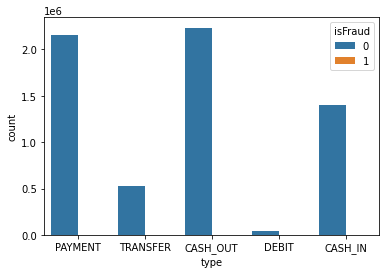

In [140]:
sns.countplot(x='type', hue='isFraud', data=df)
plt.show()


In [141]:
'''sns.boxplot(x='type', y='amount', hue='isFraud', data=df)
plt.show()'''

"sns.boxplot(x='type', y='amount', hue='isFraud', data=df)\nplt.show()"

# ***Tecnicas de balanceo***

### ***1. Muestreo Mixto*** 

In [142]:
# Separar las clases
df_fraude = df[df['isFraud'] == 1]  # Asumiendo que 1 indica fraude
df_no_fraude = df[df['isFraud'] == 0]  # Asumiendo que 0 indica no fraude

# Definir el número de muestras que quieres para cada clase
n_no_fraude = 6000
n_fraude = 4000

# Realizar el sobremuestreo de la clase de fraude
df_fraude_sobremuestreado = resample(df_fraude, replace=True, n_samples=n_fraude, random_state=42)

# Tomar una muestra aleatoria de la clase no fraude
df_no_fraude_submuestreo = df_no_fraude.sample(n=n_no_fraude, random_state=42)

# Combinar las dos clases para obtener el nuevo conjunto de datos
df_balanceado = pd.concat([df_no_fraude_submuestreo, df_fraude_sobremuestreado])

# Mezclar las filas para que los datos estén distribuidos aleatoriamente
df_sm = df_balanceado.sample(frac=1, random_state=42).reset_index(drop=True)


In [143]:
df_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            10000 non-null  int64  
 1   type            10000 non-null  object 
 2   amount          10000 non-null  float64
 3   nameOrig        10000 non-null  object 
 4   oldbalanceOrg   10000 non-null  float64
 5   newbalanceOrig  10000 non-null  float64
 6   nameDest        10000 non-null  object 
 7   oldbalanceDest  10000 non-null  float64
 8   newbalanceDest  10000 non-null  float64
 9   isFraud         10000 non-null  int64  
dtypes: float64(5), int64(2), object(3)
memory usage: 781.4+ KB


<AxesSubplot:>

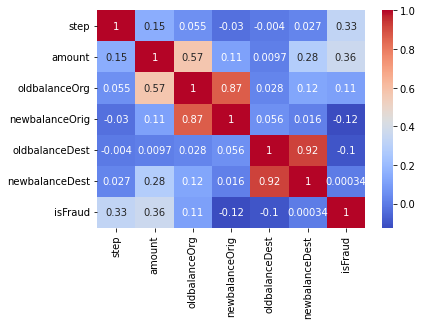

In [144]:
#Mapa de correlacion del dataset de 10 mil datos con sobremuestreo
sns.heatmap(df_sm.corr(method='pearson'),annot=True,cmap='coolwarm')

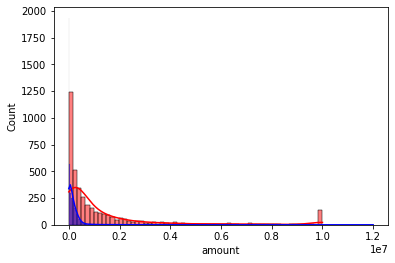

In [145]:
sns.histplot(df_sm[df_sm['isFraud']==1]['amount'], color='red', kde=True)
sns.histplot(df_sm[df_sm['isFraud']==0]['amount'], color='blue', kde=True)
plt.show()

In [146]:
df_sm.shape

(10000, 10)

In [147]:
np.unique(df_sm['isFraud'],return_counts=True)

(array([0, 1], dtype=int64), array([6000, 4000], dtype=int64))

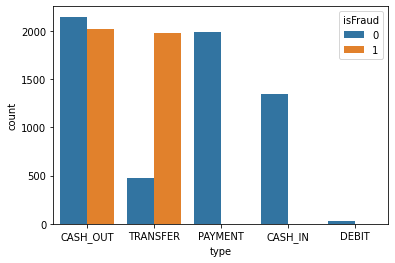

In [148]:
sns.countplot(x='type', hue='isFraud', data=df_sm)
plt.show()

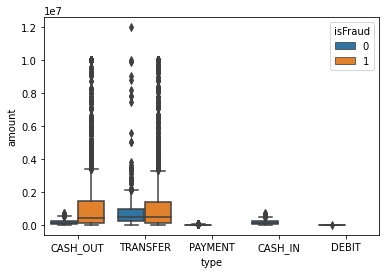

In [149]:
#Distribucion de datos
sns.boxplot(x='type', y='amount', hue='isFraud', data=df_sm)
plt.show()

In [151]:
df_sm=df_sm.drop(['nameDest','nameOrig'],axis=1)

In [152]:
#Transacciones donde ocurren los fraudes
df_sm = df_sm[df_sm['type'].isin(['CASH_OUT', 'TRANSFER'])].copy()
df_sm['type'] = df_sm['type'].apply(lambda x: 1 if x == 'TRANSFER' else 0)

X_sm = df_sm.drop('isFraud', axis=1)  
y_sm = df_sm['isFraud']

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(X_sm, y_sm, test_size=0.2, random_state=42)


In [153]:
df_sm.shape

(6622, 8)

### ***2. SMOTE Synthetic Minority Over-sampling Technique***


In [154]:
#Instalar biblioteca en cmd ==> pip install imbalanced-learn
from imblearn.over_sampling import SMOTE

In [155]:
df_red = df.drop(range(50000, len(df)))

#filtrar datos que solo pertenescan a 'CASH_OUT' o 'TRANSFER'
df_filtrado = df_red[df_red['type'].isin(['CASH_OUT', 'TRANSFER'])].copy()
#cambiamos a binario
df_filtrado['type'] = df_filtrado['type'].apply(lambda x: 1 if x == 'TRANSFER' else 0)

In [156]:
df_red.shape

(50000, 10)

In [157]:
df_filtrado.shape

(18456, 10)

In [158]:
df_filtrado = df_filtrado.drop(columns=['nameOrig','nameDest'])
df_filtrado.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18456 entries, 2 to 49991
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   step            18456 non-null  int64  
 1   type            18456 non-null  int64  
 2   amount          18456 non-null  float64
 3   oldbalanceOrg   18456 non-null  float64
 4   newbalanceOrig  18456 non-null  float64
 5   oldbalanceDest  18456 non-null  float64
 6   newbalanceDest  18456 non-null  float64
 7   isFraud         18456 non-null  int64  
dtypes: float64(5), int64(3)
memory usage: 1.3 MB


In [159]:
df_filtrado.shape

(18456, 8)

In [160]:
# Separar las características y las etiquetas
X = df_filtrado.drop('isFraud', axis=1)  
y = df_filtrado['isFraud']

# Es recomendable aplicar SMOTE después de dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Aplicar SMOTE
smote = SMOTE(sampling_strategy=0.4, random_state=42)  # 0.4 indica que la clase minoritaria será el 40% de la clase mayoritaria
X_res, y_res = smote.fit_resample(X_train, y_train)

In [161]:
X_train.shape

(13842, 7)

In [162]:
X_res.shape

(19278, 7)

In [163]:
X_test.shape

(4614, 7)

# ***Tecnicas de aprendizaje supervisado***

In [164]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, f1_score, precision_score

def RandomForest(Xtrain, Xtest, ytrain, ytest):
    random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
    
    random_forest.fit(Xtrain, ytrain)
    
    ypred = random_forest.predict(Xtest)

    accuracy = accuracy_score(ytest, ypred)
    print("Exactitud del modelo: {:.2f}%".format(accuracy * 100))
    recall = recall_score(ytest, ypred)
    print("Recall del modelo: {:.2f}%".format(recall * 100))
    precision = precision_score(ytest, ypred)
    print("Precisión: {:.2f}%".format(precision * 100))
    f1_score = 2 * (precision * recall) / (precision + recall)
    print("F1 Score: {:.2f}%".format(f1_score * 100))

    conf_matrix = confusion_matrix(ytest, ypred)

    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Real')
    plt.title('Matriz de Confusión')
    plt.show()

In [165]:
from sklearn.neighbors import KNeighborsClassifier

def KNeighbors(Xtrain, Xtest, ytrain, ytest):
    knn_model = KNeighborsClassifier(n_neighbors=3)

    # Entrenar el modelo con los datos de entrenamiento
    knn_model.fit(Xtrain, ytrain)

    # Realizar predicciones en el conjunto de prueba
    ypred = knn_model.predict(Xtest)

    # Calcular la precisión del modelo
    accuracy = accuracy_score(ytest, ypred)
    print("Exactitud del modelo: {:.2f}%".format(accuracy * 100))
    recall = recall_score(ytest, ypred)
    print("Recall del modelo: {:.2f}%".format(recall * 100))
    precision = precision_score(ytest, ypred)
    print("Precisión: {:.2f}%".format(precision * 100))
    f1_score = 2 * (precision * recall) / (precision + recall)
    print("F1 Score: {:.2f}%".format(f1_score * 100))
    
    conf_matrix = confusion_matrix(ytest, ypred)

    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Real')
    plt.title('Matriz de Confusión')
    plt.show()

In [166]:
from keras.models import Sequential
from keras.layers import Dense

def MultilayerPerceptron(X_train, X_test, y_train, y_test):
    model = Sequential()
    
    model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(1, activation='sigmoid'))

    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

    model.fit(X_train, y_train, epochs=10, batch_size=32)

    y_pred_probs = model.predict(X_test)
    y_pred = (y_pred_probs > 0.5).astype(int)  # Convertir las probabilidades en predicciones binarias
    f1score = f1_score(y_test, y_pred, average='weighted')

    # Evaluar el modelo en el conjunto de prueba
    loss, accuracy = model.evaluate(X_test, y_test)
    print("Pérdida:", loss)
    print("Exactitud del modelo: {:.2f}%".format(accuracy * 100))
    recall = recall_score(y_test, y_pred)
    print("Recall del modelo: {:.2f}%".format(recall * 100))
    precision = precision_score(y_test, y_pred)
    print("Precisión: {:.2f}%".format(precision * 100))
    print("F1 score del modelo: {:.2f}%".format(f1score * 100))
    
    
    conf_matrix = confusion_matrix(y_test, y_pred)

    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Etiqueta Predicha')
    plt.ylabel('Etiqueta Real')
    plt.title('Matriz de Confusión')
    plt.show()

# ***Tecnica de aprendizaje no-supervizado***

In [167]:
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.stats import mode

In [168]:
X_train_sm.shape

(5297, 7)

In [174]:
X_test_sm.shape

(1325, 7)

In [196]:
from sklearn.decomposition import PCA

# Crear y entrenar el modelo K-means
def train_kmeans(X, n_clusters):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    kmeans.fit(X)
    return kmeans

# Función para evaluar el modelo K-means
def evaluate_kmeans(X, kmeans_model):
    # Evaluación interna
    print("Inercia:", kmeans_model.inertia_)
    # Calcular Calinski-Harabasz Index
    ch_score = calinski_harabasz_score(X, kmeans_model.labels_)
    print(f"Calinski-Harabasz Index: {ch_score:.2f}")
    print("Silhouette Score:", silhouette_score(X, kmeans_model.labels_))
    
    # Aplicar PCA para reducir la dimensionalidad a 2D
    pca_2d = PCA(n_components=2)
    X_pca_2d = pca_2d.fit_transform(X)
    
    # Graficar datos en 2D usando PCA
    plt.figure(figsize=(10, 7))
    plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=kmeans_model.labels_, cmap='viridis')
    plt.title(f"KMeans Clustering with {kmeans_model.n_clusters} Clusters")
    plt.xlabel('Primer Componente Principal')
    plt.ylabel('Segundo Componente Principal')
    plt.show()

#

# ***LLamada y evaluacion de los modelos***

## ***Aprendizaje supervisado***

### ***1. Bosque Aleatorio***

Submuestreo:
Exactitud del modelo: 98.64%
Recall del modelo: 99.38%
Precisión: 98.40%
F1 Score: 98.88%


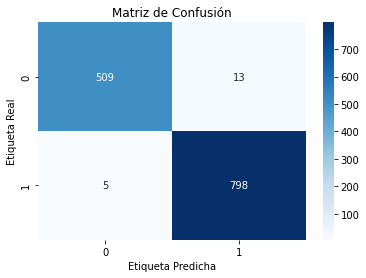

Sobremuestreo:
Exactitud del modelo: 99.48%
Recall del modelo: 67.86%
Precisión: 55.88%
F1 Score: 61.29%


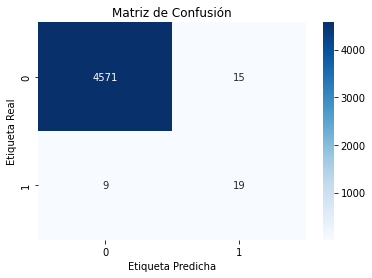

In [170]:
print("Muestro Mixto:")
RandomForest(X_train_sm, X_test_sm, y_train_sm, y_test_sm)
print("SMOTE:")
RandomForest(X_res, X_test, y_res, y_test)

### ***2. K-Vecinos mas Cercanos***

Submuestreo:
Exactitud del modelo: 94.64%
Recall del modelo: 97.26%
Precisión: 94.10%
F1 Score: 95.65%


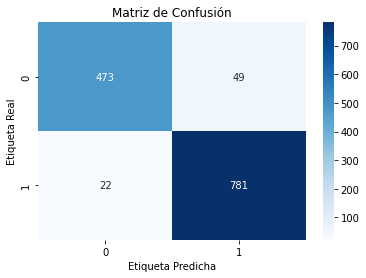

Sobremuestreo:
Exactitud del modelo: 97.62%
Recall del modelo: 64.29%
Precisión: 15.25%
F1 Score: 24.66%


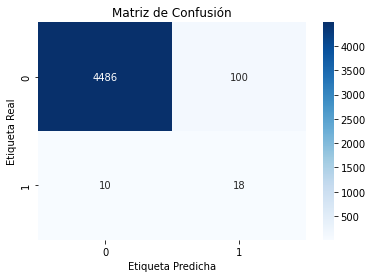

In [171]:
print("Muestreo Mixto:")
KNeighbors(X_train_sm, X_test_sm, y_train_sm, y_test_sm)
print("SMOTE:")
KNeighbors(X_res, X_test, y_res, y_test)

### ***3. Perceptrón Multicapa***

Submuestreo:
Epoch 1/10
166/166 [==============================] - 1s 782us/step - loss: 8396.6377 - accuracy: 0.8533
Epoch 2/10
166/166 [==============================] - 0s 770us/step - loss: 1958.2394 - accuracy: 0.9222
Epoch 3/10
166/166 [==============================] - 0s 751us/step - loss: 1023.5217 - accuracy: 0.9428
Epoch 4/10
166/166 [==============================] - 0s 751us/step - loss: 1553.9935 - accuracy: 0.9473
Epoch 5/10
166/166 [==============================] - 0s 812us/step - loss: 1536.6221 - accuracy: 0.9407
Epoch 6/10
166/166 [==============================] - 0s 733us/step - loss: 879.3083 - accuracy: 0.9579
Epoch 7/10
166/166 [==============================] - 0s 751us/step - loss: 1271.2451 - accuracy: 0.9449
Epoch 8/10
166/166 [==============================] - 0s 764us/step - loss: 797.2634 - accuracy: 0.9562
Epoch 9/10
166/166 [==============================] - 0s 739us/step - loss: 1058.4022 - accuracy: 0.9534
Epoch 10/10
42/42 [=========================

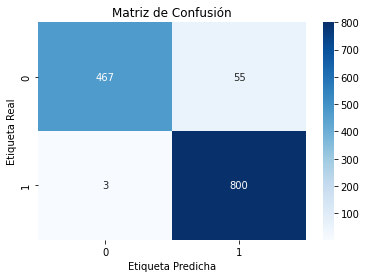

Sobremuestreo:
Epoch 1/10
603/603 [==============================] - 1s 762us/step - loss: 4378.7666 - accuracy: 0.8699
Epoch 2/10
603/603 [==============================] - 0s 766us/step - loss: 1073.4448 - accuracy: 0.9302
Epoch 3/10
603/603 [==============================] - 0s 762us/step - loss: 730.8319 - accuracy: 0.9437
Epoch 4/10
603/603 [==============================] - 0s 762us/step - loss: 769.1544 - accuracy: 0.9414
Epoch 5/10
603/603 [==============================] - 0s 757us/step - loss: 864.4371 - accuracy: 0.9476
Epoch 6/10
603/603 [==============================] - 0s 754us/step - loss: 915.8159 - accuracy: 0.9450
Epoch 7/10
603/603 [==============================] - 0s 777us/step - loss: 589.1339 - accuracy: 0.9521
Epoch 8/10
603/603 [==============================] - 0s 754us/step - loss: 544.0030 - accuracy: 0.9528
Epoch 9/10
603/603 [==============================] - 0s 754us/step - loss: 642.2687 - accuracy: 0.9537
Epoch 10/10
25973/25973 [======================

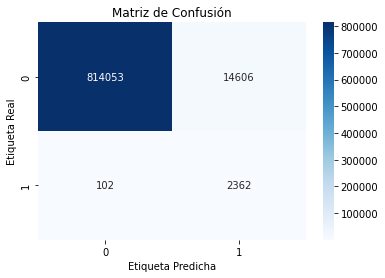

In [ ]:
print("Muestro Mixto:")
MultilayerPerceptron(X_train_sm, X_test_sm, y_train_sm, y_test_sm)
print("SMOTE:")
MultilayerPerceptron(X_res, X_test, y_res, y_test)

## ***Aprendizaje no supervisado***

### ***K-Means*** 

Inercia: 1.504830879503751e+17
Calinski-Harabasz Index: 2065.02
Silhouette Score: 0.7936154883676163


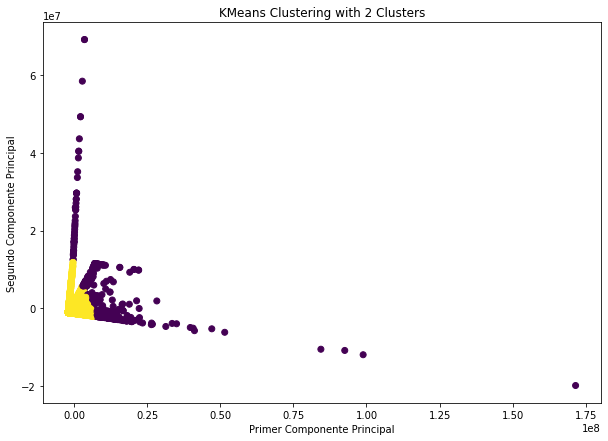

In [198]:
#Kmeans con muestro mixto
kmeans_model = train_kmeans(X_train_sm, n_clusters=2)
evaluate_kmeans(X_train_sm, kmeans_model)

Inercia: 1.3948013846541568e+17
Calinski-Harabasz Index: 35834.02
Silhouette Score: 0.8238187458785677


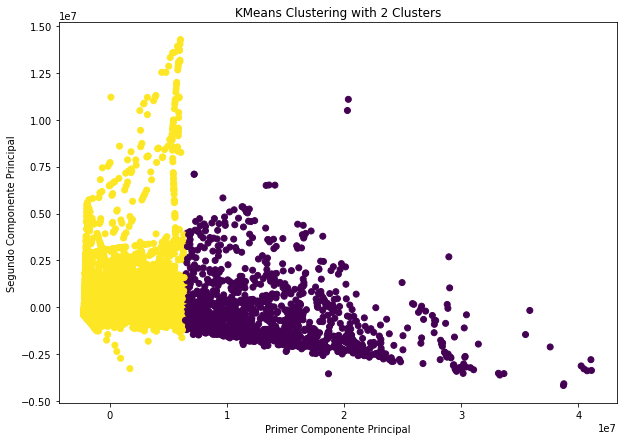

In [199]:
#Kmeans con SMOTE
kmeans_model = train_kmeans(X_res, n_clusters=2)
evaluate_kmeans(X_res, kmeans_model)

# ***Datos escalados***

Inercia: 29048.685938327053
Calinski-Harabasz Index: 1463.77
Silhouette Score: 0.6702407994993171


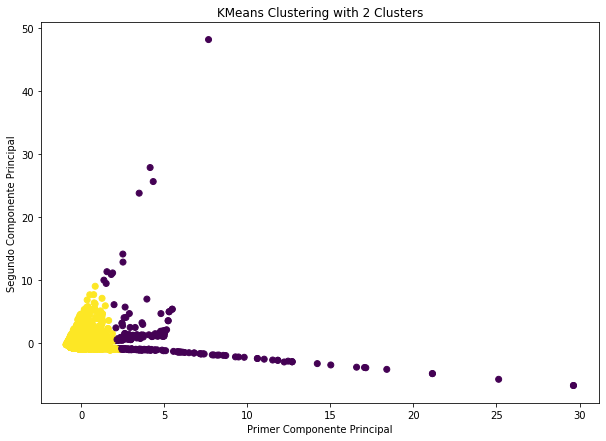

In [203]:
scaler2 = StandardScaler()
X_scaled2 = scaler2.fit_transform(X_train_sm)
#Kmeans con muestro mixto
kmeans_model = train_kmeans(X_scaled2, n_clusters=2)
evaluate_kmeans(X_scaled2, kmeans_model)

Inercia: 105959.912709442
Calinski-Harabasz Index: 5273.09
Silhouette Score: 0.6085934090384278


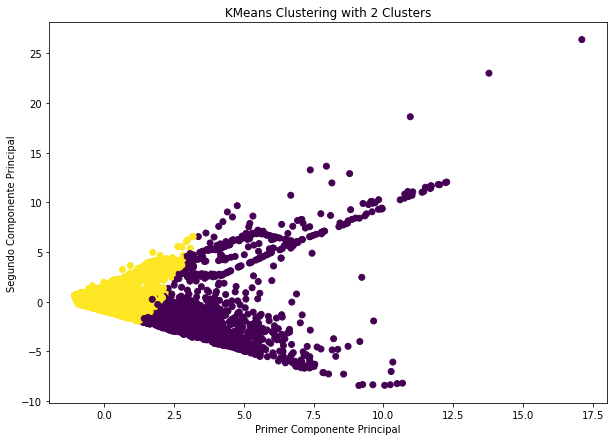

In [200]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_res)
#Kmeans con SMOTE
kmeans_model = train_kmeans(X_scaled, n_clusters=2)
evaluate_kmeans(X_scaled, kmeans_model)